<a href="https://colab.research.google.com/github/IlhamMaulanaHadinanda/Bengkel-Koding/blob/main/capstoneProject_14430.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bengkel Koding
### Nama : Ilham Maulana Hadinanda
### NIM : A11.2022.14430
### Kelp : Bengkel Koding - DS03

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv("ObesityDataSet.csv")

In [3]:
df.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21,Female,1.62,64,no,no,2,3,no,no,2,yes,0,1,Sometimes,Public_Transportation,Normal_Weight
1,21,Female,1.52,56,Sometimes,no,3,3,yes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,23,Male,1.8,77,Frequently,no,2,3,no,no,2,yes,2,1,Sometimes,Public_Transportation,Normal_Weight
3,27,Male,1.8,87,Frequently,no,3,3,no,no,2,no,2,0,Sometimes,Walking,Overweight_Level_I
4,22,Male,1.78,89.8,Sometimes,no,2,1,no,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             2097 non-null   object
 1   Gender                          2102 non-null   object
 2   Height                          2099 non-null   object
 3   Weight                          2100 non-null   object
 4   CALC                            2106 non-null   object
 5   FAVC                            2100 non-null   object
 6   FCVC                            2103 non-null   object
 7   NCP                             2099 non-null   object
 8   SCC                             2101 non-null   object
 9   SMOKE                           2106 non-null   object
 10  CH2O                            2105 non-null   object
 11  family_history_with_overweight  2098 non-null   object
 12  FAF                             2103 non-null   

In [5]:
display(df.describe(include='all'))

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
count,2097,2102,2099,2100,2106,2100,2103,2099,2101,2106,2105,2098,2103,2102,2100,2105,2111
unique,1394,3,1562,1518,5,3,808,637,3,3,1263,3,1186,1130,5,6,7
top,18,Male,1.7,80,Sometimes,yes,3,3,no,no,2,yes,0,0,Sometimes,Public_Transportation,Obesity_Type_I
freq,124,1056,58,58,1386,1844,647,1183,1997,2054,441,1705,404,552,1747,1572,351


In [6]:
df.isnull().sum()

,0
Age,14
Gender,9
Height,12
Weight,11
CALC,5
FAVC,11
FCVC,8
NCP,12
SCC,10
SMOKE,5


In [7]:
print(df.duplicated().sum())

18


In [8]:
categorical_cols = ['Age', 'Gender', 'Height', 'Weight', 'CALC', 'FAVC', 'FCVC',	'NCP', 'SCC', 'SMOKE', 'CH2O', 'FAF', 'TUE',
                    'family_history_with_overweight', 'CAEC', 'MTRANS', 'NObeyesdad']
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

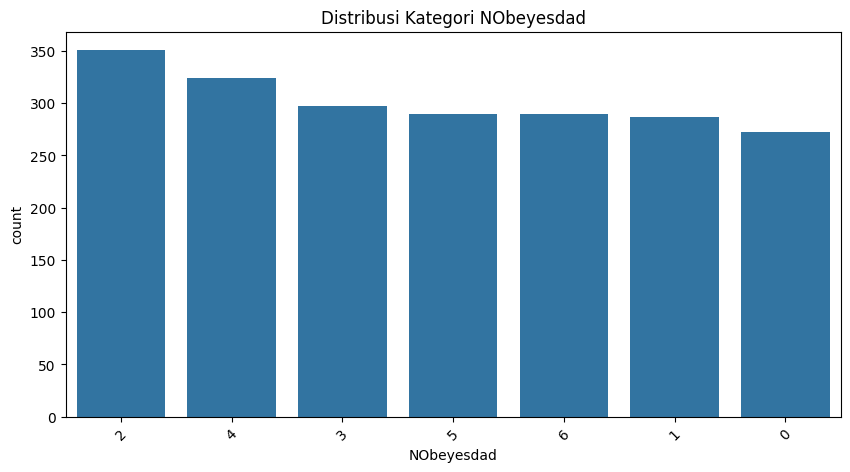

In [9]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='NObeyesdad', order=df['NObeyesdad'].value_counts().index)
plt.title('Distribusi Kategori NObeyesdad')
plt.xticks(rotation=45)
plt.show()

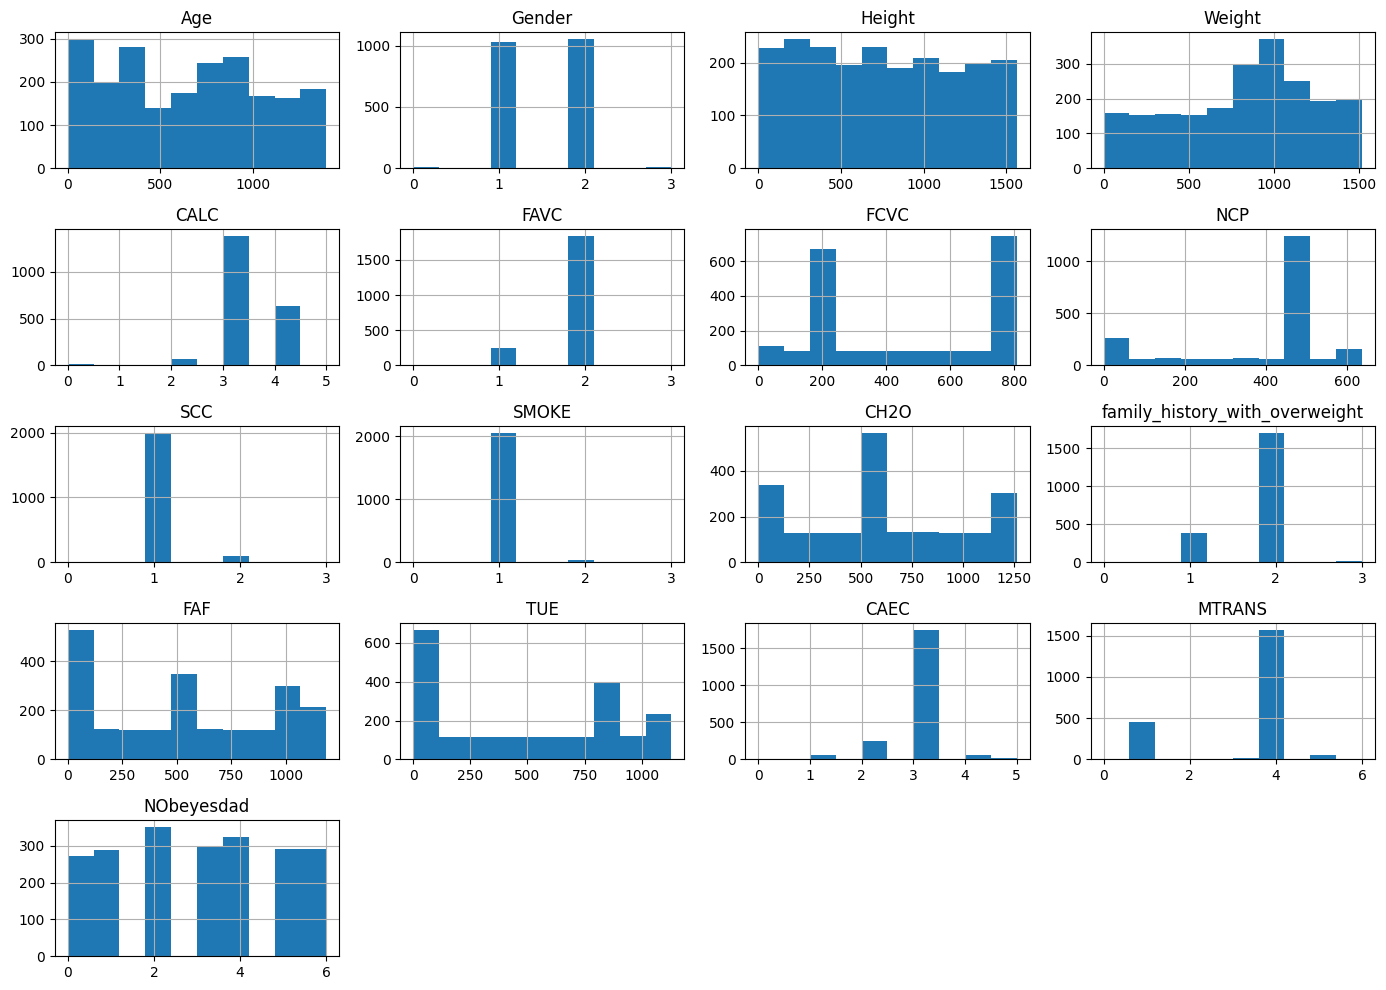

In [10]:
numeric_features = df.select_dtypes(include=[np.number]).columns
df[numeric_features].hist(figsize=(14, 10))
plt.tight_layout()
plt.show()

In [11]:
for col in df.columns:
    print(f"{col}: {df[col].nunique()}")

Age: 1395
Gender: 4
Height: 1563
Weight: 1519
CALC: 6
FAVC: 4
FCVC: 809
NCP: 638
SCC: 4
SMOKE: 4
CH2O: 1264
family_history_with_overweight: 4
FAF: 1187
TUE: 1131
CAEC: 6
MTRANS: 7
NObeyesdad: 7


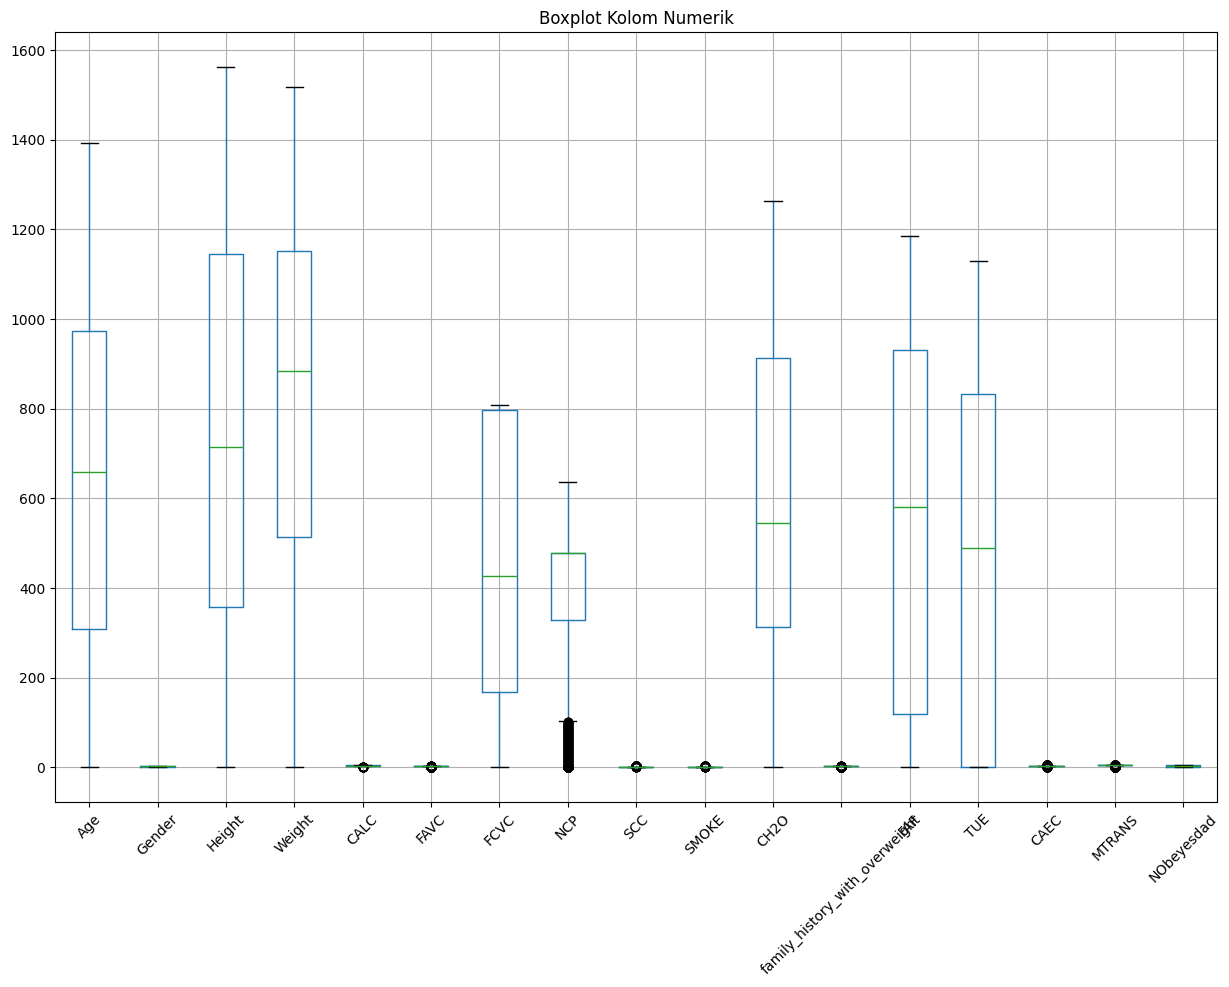

In [12]:
# Boxplot untuk deteksi outlier
plt.figure(figsize=(15, 10))
df[numeric_features].boxplot()
plt.title('Boxplot Kolom Numerik')
plt.xticks(rotation=45)
plt.show()

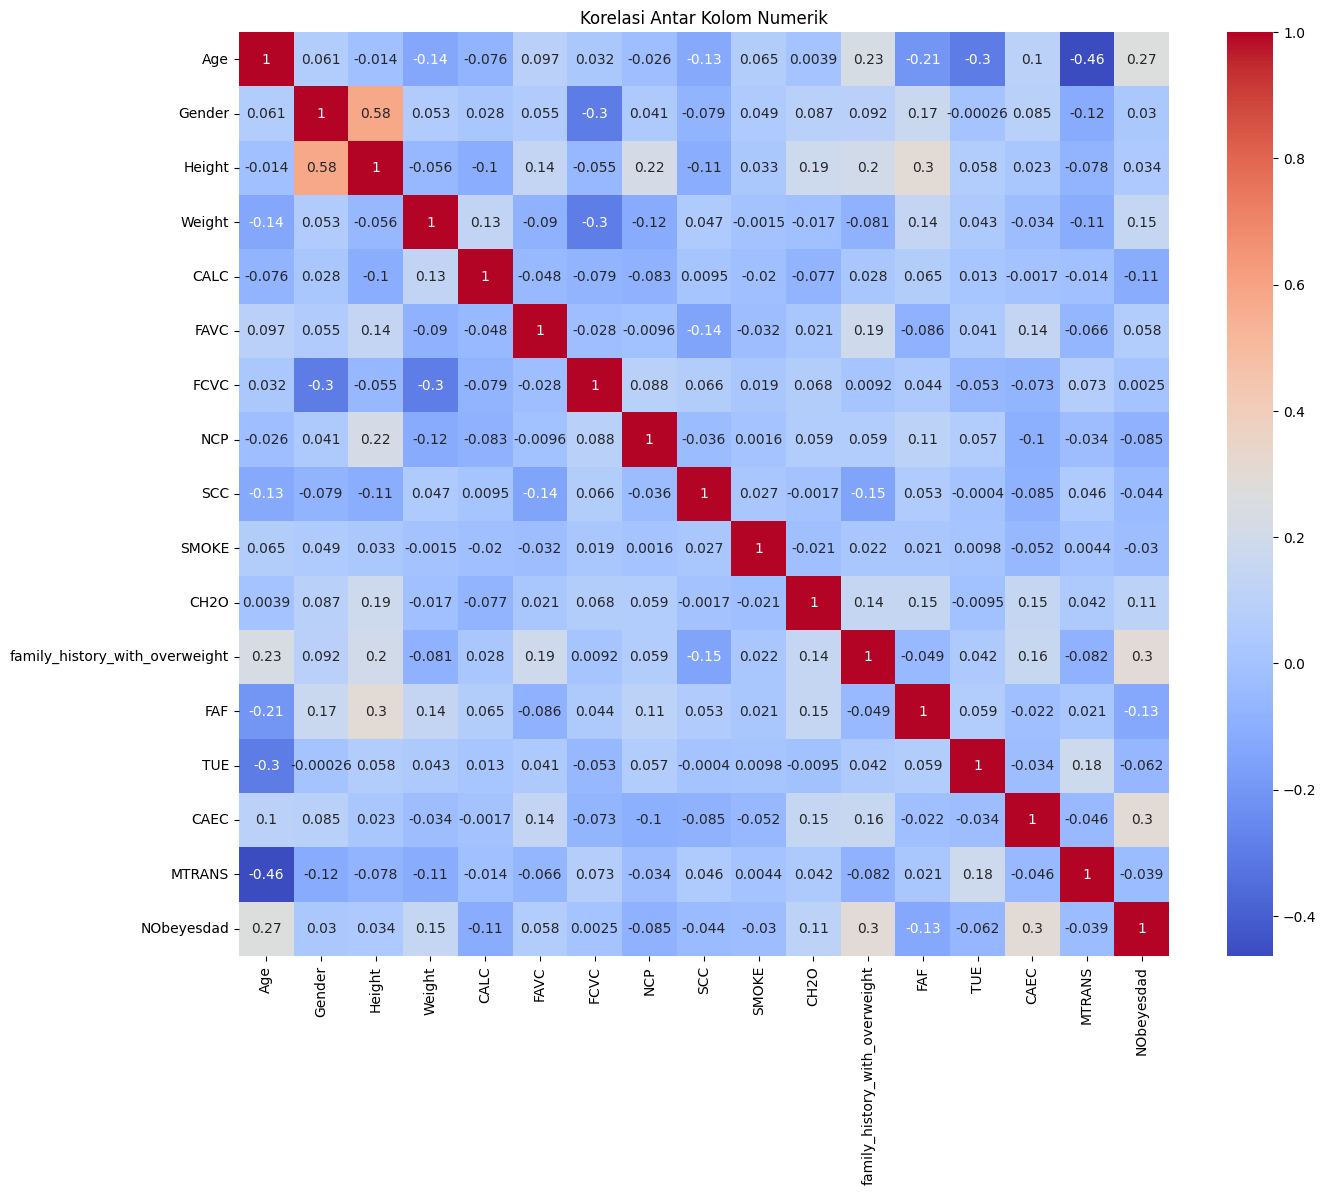

In [13]:
# Heatmap korelasi
plt.figure(figsize=(15, 12))
sns.heatmap(df[numeric_features].corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi Antar Kolom Numerik')
plt.show()

1. Struktur dan Tipe Data
- Dataset memiliki 2111 baris dan 17 kolom.

- Semua kolom awalnya bertipe object meskipun beberapa seharusnya numerik (Age, Height, Weight, dll).

2. Kebersihan Data
- Terdapat missing values di hampir semua kolom, meskipun jumlahnya relatif kecil.

- Ada sejumlah data duplikat sebanyak 18 data yang perlu dihapus.

3. Distribusi Data: Target class (NObeyesdad) cukup seimbang, namun beberapa kategori sedikit lebih dominan.

4. Outlier: Boxplot menunjukkan keberadaan outlier pada kolom

5. Korelasi: Korelasi antar fitur numerik relatif rendah, yang menunjukkan sebagian besar fitur saling independen.